# Introducción a Pandas

Aprenderemos a utilizar pandas para el análisis de datos:

* Introducción a Pandas
* Series
* DataFrames
* Valores perdidos
* GroupBy
* Fusionado, Unión y Concatenación
* Operaciones habituales
* Entrada y salida de datos

___

In [222]:
import numpy as np
import pandas as pd

# Series

### Creando Series

Conversión de una lista, Array Numpy o diccionario a Series.

Primero, creamos las variables:

In [223]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array((10,20,30))
d = {'a':10,'b':20,'c':30}

print (labels, type(labels))
print (my_list, type(my_list))
print (arr, type(arr))
print (d, type(d))

['a', 'b', 'c'] <class 'list'>
[10, 20, 30] <class 'list'>
[10 20 30] <class 'numpy.ndarray'>
{'a': 10, 'b': 20, 'c': 30} <class 'dict'>


### Usando listas

In [224]:
serie_de_lista = pd.Series(data=my_list)
print(serie_de_lista, type(serie_de_lista))

0    10
1    20
2    30
dtype: int64 <class 'pandas.core.series.Series'>


In [225]:
serie_de_lista[0]

10

In [226]:
# Asignamos etiquetas a la serie
serie_de_lista = pd.Series(data=my_list, index=labels)
print(serie_de_lista, type(serie_de_lista))

a    10
b    20
c    30
dtype: int64 <class 'pandas.core.series.Series'>


Los parámetros data e index se pueden introducir por posición

In [227]:
serie_de_lista = pd.Series(my_list, labels)
print(serie_de_lista, type(serie_de_lista))

a    10
b    20
c    30
dtype: int64 <class 'pandas.core.series.Series'>


### Usando Arrays

In [228]:
serie_de_array = pd.Series(arr, labels)
print(serie_de_array, type(serie_de_array))

a    10
b    20
c    30
dtype: int64 <class 'pandas.core.series.Series'>


### Usando Diccionarios

In [229]:
serie_de_diccionario = pd.Series(d)
print(serie_de_diccionario, type(serie_de_diccionario))

a    10
b    20
c    30
dtype: int64 <class 'pandas.core.series.Series'>


### Usando índices

La clave para usar Series, es entender sus índices. Pandas puede usar índices en formato numéricos o en formato texto.

In [230]:
ser1 = pd.Series(np.random.rand(4), index = ['EEUU', 'Alemania','Rusia', 'Japón'])
ser2 = pd.Series(np.random.rand(4), index = ['EEUU', 'Alemania','Italia', 'Japón'])
print (ser1)
print ()
print (ser2)

EEUU        0.842342
Alemania    0.083195
Rusia       0.763683
Japón       0.243666
dtype: float64

EEUU        0.194223
Alemania    0.572457
Italia      0.095713
Japón       0.885327
dtype: float64


En los notebooks puedo ver el contenido de un objeto de pandas con el método display.

In [231]:
display(ser1)
display(ser2)

,0
EEUU,0.842342
Alemania,0.083195
Rusia,0.763683
Japón,0.243666


,0
EEUU,0.194223
Alemania,0.572457
Italia,0.095713
Japón,0.885327


Las series de Python usan la sintaxis de los diccionarios para acceder a los valores.

Pero ahora, la clave de acceso puede ser una lista de índices en lugar de sólo una clave de diccionario.

In [232]:
print(ser1['EEUU'])
print("Como serie de índices")
print(ser1[['EEUU']])
print()
print(ser1[['Rusia','EEUU']])
print()
print(ser1[['Rusia','EEUU', 'Japón']])

0.8423424376202573
Como serie de índices
EEUU    0.842342
dtype: float64

Rusia    0.763683
EEUU     0.842342
dtype: float64

Rusia    0.763683
EEUU     0.842342
Japón    0.243666
dtype: float64


## Operaciones con series

In [233]:
ser1

,0
EEUU,0.842342
Alemania,0.083195
Rusia,0.763683
Japón,0.243666


In [234]:
ser2

,0
EEUU,0.194223
Alemania,0.572457
Italia,0.095713
Japón,0.885327


Las operaciones se realizan en función del índice

In [235]:
suma = ser1 + ser2

In [236]:
suma

,0
Alemania,0.655652
EEUU,1.036565
Italia,NaN
Japón,1.128993
Rusia,NaN


In [237]:
ser1 * ser2

,0
Alemania,0.047626
EEUU,0.163602
Italia,NaN
Japón,0.215724
Rusia,NaN


In [238]:
type(ser1 + ser2)

pandas.core.series.Series

# DataFrames

Podemos ver un DataFrame como un conjunto de objetos `Series` unidos.

In [239]:
import pandas as pd
import numpy as np
from numpy.random import randn
np.random.seed(123)

In [240]:
indice = 'A B C D E'.split()
columnas = 'W X Y Z'.split()
print(indice, columnas)

['A', 'B', 'C', 'D', 'E'] ['W', 'X', 'Y', 'Z']


In [275]:
df = pd.DataFrame(randn(5,4),index=indice, columns=columnas)
df

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
C,-0.140069,-0.861755,-0.255619,-2.798589
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


## Selección e indexación


### Selección de columnas

In [242]:
df['W']

,W
A,-1.085631
B,-0.578600
C,1.265936
D,1.491390
E,2.205930


In [243]:
type(df)

pandas.core.frame.DataFrame

Cuando extraigo una única columna, o fila, obtengo un objeto `Series`

In [244]:
type(df['W'])

pandas.core.series.Series

Como vemos la columna W es simplemente una Serie

Pero si selecciono dos, sigue devolviendo una tabla, es decir, un DataFrame

In [245]:
# Selección de varias columnas por su nombre
df[['Z','W']]

,Z,W
A,-1.506295,-1.085631
B,-0.428913,-0.578600
C,-0.094709,1.265936
D,-0.434351,1.491390
E,0.386186,2.205930


Pandas también permite sintaxis tipo SQL, no obstante no se recomienda su uso.

In [246]:
df.W

,W
A,-1.085631
B,-0.578600
C,1.265936
D,1.491390
E,2.205930


### Selección de filas

In [247]:
# Para selección filas con etiquetas
df.loc['B']

,B
W,-0.578600
X,1.651437
Y,-2.426679
Z,-0.428913


In [248]:
type(df.loc['B'])

pandas.core.series.Series

In [249]:
# Para selección filas por índices
df.iloc[3]

,D
W,1.491390
X,-0.638902
Y,-0.443982
Z,-0.434351


### Selección de un subset de datos

In [250]:
df.loc[['A','B'],['W','Y']]


,W,Y
A,-1.085631,0.282978
B,-0.578600,-2.426679


In [251]:
# Selección de 2 filas y todas las columnas.
df.loc[['A','B'],]

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913


In [252]:
df.iloc[0:2][:]

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913


In [253]:
df.iloc[0:2,]

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913


In [254]:
df.iloc[0:2,:]

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913


## Creando una nueva columna

In [255]:
df['nueva'] = df['W'] + df['Y']
df

,W,X,Y,Z,nueva
A,-1.085631,0.997345,0.282978,-1.506295,-0.802652
B,-0.578600,1.651437,-2.426679,-0.428913,-3.005279
C,1.265936,-0.866740,-0.678886,-0.094709,0.587050
D,1.491390,-0.638902,-0.443982,-0.434351,1.047408
E,2.205930,2.186786,1.004054,0.386186,3.209984


In [256]:
df['clase'] = 0
df

,W,X,Y,Z,nueva,clase
A,-1.085631,0.997345,0.282978,-1.506295,-0.802652,0
B,-0.578600,1.651437,-2.426679,-0.428913,-3.005279,0
C,1.265936,-0.866740,-0.678886,-0.094709,0.587050,0
D,1.491390,-0.638902,-0.443982,-0.434351,1.047408,0
E,2.205930,2.186786,1.004054,0.386186,3.209984,0


## Eliminar columnas

In [257]:
# df.drop(columns="nueva")

In [258]:
df.drop('nueva', axis=1)

,W,X,Y,Z,clase
A,-1.085631,0.997345,0.282978,-1.506295,0
B,-0.578600,1.651437,-2.426679,-0.428913,0
C,1.265936,-0.866740,-0.678886,-0.094709,0
D,1.491390,-0.638902,-0.443982,-0.434351,0
E,2.205930,2.186786,1.004054,0.386186,0


Pero el dataframe continúa íntegro

In [259]:
df

,W,X,Y,Z,nueva,clase
A,-1.085631,0.997345,0.282978,-1.506295,-0.802652,0
B,-0.578600,1.651437,-2.426679,-0.428913,-3.005279,0
C,1.265936,-0.866740,-0.678886,-0.094709,0.587050,0
D,1.491390,-0.638902,-0.443982,-0.434351,1.047408,0
E,2.205930,2.186786,1.004054,0.386186,3.209984,0


Hay 2 maneras diferentes de borrar una columna y que el cambio se guarde en el DataFrame original
```
df = df.drop('nombre_columna',axis=1)
```
o bien:
```
df.drop('nombre_columna',axis=1, inplace=True)
```


In [260]:
df.drop('nueva',axis=1, inplace=True)
df

,W,X,Y,Z,clase
A,-1.085631,0.997345,0.282978,-1.506295,0
B,-0.578600,1.651437,-2.426679,-0.428913,0
C,1.265936,-0.866740,-0.678886,-0.094709,0
D,1.491390,-0.638902,-0.443982,-0.434351,0
E,2.205930,2.186786,1.004054,0.386186,0


In [220]:
df = df.drop('clase',axis=1)
df

KeyError: "['clase'] not found in axis"

Si intento borrar una columna que ya no existe obtengo un error

In [261]:
del df["clase"]

In [262]:
df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


## Eliminar filas

In [263]:
df.drop('D', axis=0)

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
E,2.205930,2.186786,1.004054,0.386186


A menos que lo especifiquemos con inplace, no se elimina nada

In [264]:
df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351
E,2.205930,2.186786,1.004054,0.386186


Hay 2 maneras diferentes de borrar una fila y que el cambio se guarde en el DataFrame original
```
df = df.drop('D',axis=0)
```
o bien:
```
df.drop('D',axis=0, inplace=True)
```





**Eliminar filas**

In [265]:
df.drop('E',axis=0, inplace=True)
df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
C,1.265936,-0.866740,-0.678886,-0.094709
D,1.491390,-0.638902,-0.443982,-0.434351


In [270]:
df.drop(index="C", inplace=True)
df

,W,X,Y,Z
A,-1.085631,0.997345,0.282978,-1.506295
B,-0.578600,1.651437,-2.426679,-0.428913
D,1.491390,-0.638902,-0.443982,-0.434351


In [271]:
df.shape

(3, 4)

Número de filas

In [272]:
df.shape[0]

3

Número de columnas

In [273]:
df.shape[1]

4

## Filtros

### Selección condicional


Una importante característica de Pandas es la selección condicional de manera muy similar a Numpy:

In [276]:
df

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
C,-0.140069,-0.861755,-0.255619,-2.798589
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


In [277]:
df>0

,W,X,Y,Z
A,True,True,False,True
B,False,False,True,False
C,False,False,False,False
D,False,False,True,False
E,True,True,False,True


Este dataframe booleano funciona como un filtro

In [278]:
df[df>0]

,W,X,Y,Z
A,0.737369,1.490732,NaN,1.175829
B,NaN,NaN,0.907105,NaN
C,NaN,NaN,NaN,NaN
D,NaN,NaN,0.927462,NaN
E,0.002846,0.688223,NaN,0.283627


Filtrado de todo el DataFrame utilizando sólo los valores de una columna

In [280]:
print(df['W']>0)
df_filtrado = df[df['W']>0]
df_filtrado

A     True
B    False
C    False
D    False
E     True
Name: W, dtype: bool


,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
E,0.002846,0.688223,-0.879536,0.283627


In [281]:
df

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
C,-0.140069,-0.861755,-0.255619,-2.798589
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


In [282]:
print(df['W']>0)
df[df['W']>0]['Y']

A     True
B    False
C    False
D    False
E     True
Name: W, dtype: bool


,Y
A,-0.935834
E,-0.879536


In [283]:
df[df['W']>0][['Y','X']]

,Y,X
A,-0.935834,1.490732
E,-0.879536,0.688223


Podemos concatenar condiciones con | y &.  Deberemos encerrar entre paréntesis cada una de las condiciones:

In [284]:
df

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
C,-0.140069,-0.861755,-0.255619,-2.798589
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


In [286]:
df[(df['W']>0) & (df['Y'] < -0.9)]

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829


In [288]:
df[(df['W']>0) | (df['Y'] > 0.5)]

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


### Filtrar fila por condición

In [289]:
df

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
C,-0.140069,-0.861755,-0.255619,-2.798589
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


In [293]:
df.loc['A'] > 0

,A
W,True
X,True
Y,False
Z,True


In [296]:
df.loc[:,df.loc['A'] > 0]

,W,X,Z
A,0.737369,1.490732,1.175829
B,-1.253881,-0.637752,-1.428681
C,-0.140069,-0.861755,-2.798589
D,-1.771533,-0.699877,-0.173636
E,0.002846,0.688223,0.283627


In [297]:
df.loc['A'][df.loc['A'] > 0]

,A
W,0.737369
X,1.490732
Z,1.175829


In [298]:
df.iloc[0][df.iloc[0] > 0]

,A
W,0.737369
X,1.490732
Z,1.175829


## Más sobre índices

In [299]:
df

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
C,-0.140069,-0.861755,-0.255619,-2.798589
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


In [300]:
# Reseteamos el índice a una secuencia de 0 a n
df.reset_index()

,index,W,X,Y,Z
0,A,0.737369,1.490732,-0.935834,1.175829
1,B,-1.253881,-0.637752,0.907105,-1.428681
2,C,-0.140069,-0.861755,-0.255619,-2.798589
3,D,-1.771533,-0.699877,0.927462,-0.173636
4,E,0.002846,0.688223,-0.879536,0.283627


In [301]:
nuevoindice = 'CA NY WY OR CO'.split()

In [302]:
nuevoindice

['CA', 'NY', 'WY', 'OR', 'CO']

In [303]:
df

,W,X,Y,Z
A,0.737369,1.490732,-0.935834,1.175829
B,-1.253881,-0.637752,0.907105,-1.428681
C,-0.140069,-0.861755,-0.255619,-2.798589
D,-1.771533,-0.699877,0.927462,-0.173636
E,0.002846,0.688223,-0.879536,0.283627


In [305]:
df2 = df.copy()
df2.loc["Estados"] = nuevoindice
df2

,W,X,Y,Z,Estados
A,0.737369,1.490732,-0.935834,1.175829,CA
B,-1.253881,-0.637752,0.907105,-1.428681,NY
C,-0.140069,-0.861755,-0.255619,-2.798589,WY
D,-1.771533,-0.699877,0.927462,-0.173636,OR
E,0.002846,0.688223,-0.879536,0.283627,CO
Estados,CA,NY,WY,OR,CO


In [306]:
df['Estados'] = nuevoindice
df

,W,X,Y,Z,Estados
A,0.737369,1.490732,-0.935834,1.175829,CA
B,-1.253881,-0.637752,0.907105,-1.428681,NY
C,-0.140069,-0.861755,-0.255619,-2.798589,WY
D,-1.771533,-0.699877,0.927462,-0.173636,OR
E,0.002846,0.688223,-0.879536,0.283627,CO


Utilizamos la columna Estados como índice en el dataset

In [307]:
df.set_index('Estados')

,W,X,Y,Z
Estados,,,,
CA,0.737369,1.490732,-0.935834,1.175829
NY,-1.253881,-0.637752,0.907105,-1.428681
WY,-0.140069,-0.861755,-0.255619,-2.798589
OR,-1.771533,-0.699877,0.927462,-0.173636
CO,0.002846,0.688223,-0.879536,0.283627


Tenemos que tener en cuenta que si no usamos el argumento inplace, no se aplican los cambios

In [308]:
df

,W,X,Y,Z,Estados
A,0.737369,1.490732,-0.935834,1.175829,CA
B,-1.253881,-0.637752,0.907105,-1.428681,NY
C,-0.140069,-0.861755,-0.255619,-2.798589,WY
D,-1.771533,-0.699877,0.927462,-0.173636,OR
E,0.002846,0.688223,-0.879536,0.283627,CO


In [309]:
df.set_index('Estados', inplace=True)
df

,W,X,Y,Z
Estados,,,,
CA,0.737369,1.490732,-0.935834,1.175829
NY,-1.253881,-0.637752,0.907105,-1.428681
WY,-0.140069,-0.861755,-0.255619,-2.798589
OR,-1.771533,-0.699877,0.927462,-0.173636
CO,0.002846,0.688223,-0.879536,0.283627


In [311]:
df.loc["WY"]

,WY
W,-0.140069
X,-0.861755
Y,-0.255619
Z,-2.798589


## Índices múltiples y jerarquía en los índices

In [313]:
# Creamos diferentes 'índices'
outside = ['G1','G1','G1','G2','G2','G3']
inside = [1,2,3,1,2,1]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [314]:
print (outside)
print (inside)
print (hier_index)


['G1', 'G1', 'G1', 'G2', 'G2', 'G3']
[1, 2, 3, 1, 2, 1]
MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G3', 1)],
           )


In [315]:
df = pd.DataFrame(np.random.randn(6,2), index=hier_index, columns=['A','B'])
df

A         B
G1 1 -0.805367 -1.727669
   2 -0.390900  0.573806
   3  0.338589 -0.011830
G2 1  2.392365  0.412912
   2  0.978736  2.238143
G3 1 -1.294085 -1.038788

¿Cómo extraemos los datos en base a este índice doble?

In [318]:
# Haciendo uso de .loc
df.loc['G1']

,A,B
1,-0.805367,-1.727669
2,-0.390900,0.573806
3,0.338589,-0.011830


In [319]:
df.loc['G1'].loc[1]

,1
A,-0.805367
B,-1.727669


In [70]:
df.loc['G1'].iloc[1:]

,A,B
2,-0.935834,1.175829
3,-1.253881,-0.637752


Podemos entender G1 y G2 como una columna extra que se usa para el filtrado.
Además a los índices podemos asignarles nombres

In [320]:
df.index.names

FrozenList([None, None])

In [321]:
df.index.names = ['Grupo','Número']
df

A         B
Grupo Número                    
G1    1      -0.805367 -1.727669
      2      -0.390900  0.573806
      3       0.338589 -0.011830
G2    1       2.392365  0.412912
      2       0.978736  2.238143
G3    1      -1.294085 -1.038788

# Valores perdidos

In [74]:
import numpy as np
import pandas as pd

In [325]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       1 non-null      float64
 2   C       3 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


In [326]:
df.describe()

,A,B,C
count,2.000000,1.0,3.0
mean,1.500000,5.0,2.0
std,0.707107,NaN,1.0
min,1.000000,5.0,1.0
25%,1.250000,5.0,1.5
50%,1.500000,5.0,2.0
75%,1.750000,5.0,2.5
max,2.000000,5.0,3.0


In [329]:
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [330]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [331]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [332]:
df.dropna(thresh=2, axis=1)

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [333]:
df.fillna(value='Valor Rellenado', inplace=True)

<ipython-input-333-3af6157c2dd4>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Valor Rellenado' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(value='Valor Rellenado', inplace=True)


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       3 non-null      object
 1   B       3 non-null      object
 2   C       3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [335]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,Valor Rellenado,2
2,Valor Rellenado,Valor Rellenado,3


In [336]:
df["A"] + df["B"]

TypeError: unsupported operand type(s) for +: 'float' and 'str'

Una caso más elaborado (y habitual), sería el de imputar la media de su columna a los NA

In [ ]:
pd.DataFrame(data = np.random.rand(5,5), columns = 'A B C D E'.split())

In [346]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [347]:
media = df['A'].mean()

In [348]:
df["A"] = df['A'].fillna(value=media)

In [349]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3


In [350]:
df["B"] = df['B'].fillna(value=df['B'].max())

In [342]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,1.5,5.0,3


# Groupby
El método groupby permite agrupar filas en base a un criterio y ejecutar operaciones de agregación sobre las mismas.

In [359]:
import pandas as pd
# Generación del dataframe
data = {'Compañía':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Trabajador':['Ana','Carlos','Rosa','Vanesa','Carlos','Sara'],
       'Ventas':[200,120,340,124,243,350],
        'Compras':[130,100,140,84,203,130]}
df = pd.DataFrame(data)

In [360]:
df

,Compañía,Trabajador,Ventas,Compras
0,GOOG,Ana,200,130
1,GOOG,Carlos,120,100
2,MSFT,Rosa,340,140
3,MSFT,Vanesa,124,84
4,FB,Carlos,243,203
5,FB,Sara,350,130


In [361]:
# Agrupamos los datos en base a la columna Compañía
df.groupby('Compañía')

In [362]:
# Guardamos el resultado en una variable
grupo = df.groupby('Compañía')

In [363]:
# Extraer los datos concretos de una compañía
df[df['Compañía'] == "GOOG"]

,Compañía,Trabajador,Ventas,Compras
0,GOOG,Ana,200,130
1,GOOG,Carlos,120,100


In [364]:
# Ahora podemos aplicar funciones sobre la agrupación.
grupo.sum()

,Trabajador,Ventas,Compras
Compañía,,,
FB,CarlosSara,593,333
GOOG,AnaCarlos,320,230
MSFT,RosaVanesa,464,224


In [365]:
df.groupby('Compañía').sum()

,Trabajador,Ventas,Compras
Compañía,,,
FB,CarlosSara,593,333
GOOG,AnaCarlos,320,230
MSFT,RosaVanesa,464,224


In [369]:
df.groupby('Compañía')[['Ventas', "Compras"]].mean()

,Ventas,Compras
Compañía,,
FB,296.5,166.5
GOOG,160.0,115.0
MSFT,232.0,112.0


In [371]:
# Para medias, tenemos que hacer un pequeño cambio puesto que sólo podemos agregar explícitamente en columnas numéricas.
df.groupby('Compañía').agg({'Ventas':'mean', 'Compras':'sum'})

,Ventas,Compras
Compañía,,
FB,296.5,333
GOOG,160.0,230
MSFT,232.0,224


Más ejemplos de agregaciones

In [373]:
df.groupby('Compañía')['Ventas'].agg(['mean','sum'])

,mean,sum
Compañía,,
FB,296.5,593
GOOG,160.0,320
MSFT,232.0,464


In [374]:
df.groupby('Compañía')['Compras'].agg(['mean','sum'])

,mean,sum
Compañía,,
FB,166.5,333
GOOG,115.0,230
MSFT,112.0,224


In [375]:
df.groupby('Compañía').count()

,Trabajador,Ventas,Compras
Compañía,,,
FB,2,2,2
GOOG,2,2,2
MSFT,2,2,2


In [376]:
df.groupby('Compañía').agg({"Trabajador": "count", "Ventas": "sum", "Compras": "sum"})

,Trabajador,Ventas,Compras
Compañía,,,
FB,2,593,333
GOOG,2,320,230
MSFT,2,464,224


In [379]:
df.groupby('Compañía').agg({'Ventas':'std'})

,Ventas
Compañía,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


#### Agrupación de los datos en base al nombre del trabajador, usando una función lambda

In [99]:
df2 = df.groupby(['Trabajador'], as_index=False)

In [100]:
df2.agg(**{'Trabajador':('Trabajador', lambda x: ','.join(x))})

,Trabajador
0,Ana
1,"Carlos,Carlos"
2,Rosa
3,Sara
4,Vanesa


'Trabajador': Es la columna sobre la cual se está realizando la operación de agregación.

('Trabajador', lambda x: ','.join(x)): Es una tupla que contiene dos elementos:
* 'Trabajador': El nombre de la nueva columna resultante de la operación de agregación.
* lambda x: ','.join(x): Una función lambda que toma la columna original 'Trabajador' y aplica la función ','.join a sus elementos. Esto significa que va a unir todos los elementos de la columna 'Trabajador' con comas entre ellos.

Los dos asteriscos (**) se utilizan para desempaquetar el contenido del diccionario. En el contexto de la función agg, esto es necesario porque la función espera argumentos clave y valor, y el uso de ** permite pasar un diccionario como argumento de manera que sus elementos se interpreten como argumentos clave y valor.

Podemos hacer un 'describe' para ver las características de nuestra agrupación de datos

In [380]:
df.describe()

,Ventas,Compras
count,6.000000,6.000000
mean,229.500000,131.166667
std,100.899455,41.077569
min,120.000000,84.000000
25%,143.000000,107.500000
50%,221.500000,130.000000
75%,315.750000,137.500000
max,350.000000,203.000000


In [381]:
grupo.describe()

Ventas                                                          \
          count   mean         std    min     25%    50%     75%    max   
Compañía                                                                  
FB          2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0   
GOOG        2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0   
MSFT        2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0   

         Compras                                                         
           count   mean        std    min     25%    50%     75%    max  
Compañía                                                                 
FB           2.0  166.5  51.618795  130.0  148.25  166.5  184.75  203.0  
GOOG         2.0  115.0  21.213203  100.0  107.50  115.0  122.50  130.0  
MSFT         2.0  112.0  39.597980   84.0   98.00  112.0  126.00  140.0

In [384]:
# Si no nos gusta como se muestra la información podemos EEUUr el método transpose
grupo.describe().transpose()

Compañía               FB        GOOG        MSFT
Ventas  count    2.000000    2.000000    2.000000
        mean   296.500000  160.000000  232.000000
        std     75.660426   56.568542  152.735065
        min    243.000000  120.000000  124.000000
        25%    269.750000  140.000000  178.000000
        50%    296.500000  160.000000  232.000000
        75%    323.250000  180.000000  286.000000
        max    350.000000  200.000000  340.000000
Compras count    2.000000    2.000000    2.000000
        mean   166.500000  115.000000  112.000000
        std     51.618795   21.213203   39.597980
        min    130.000000  100.000000   84.000000
        25%    148.250000  107.500000   98.000000
        50%    166.500000  115.000000  112.000000
        75%    184.750000  122.500000  126.000000
        max    203.000000  130.000000  140.000000

In [385]:
# Descripción de la compañía FB
grupo.describe().loc['FB']

Ventas   count      2.000000
         mean     296.500000
         std       75.660426
         min      243.000000
         25%      269.750000
         50%      296.500000
         75%      323.250000
         max      350.000000
Compras  count      2.000000
         mean     166.500000
         std       51.618795
         min      130.000000
         25%      148.250000
         50%      166.500000
         75%      184.750000
         max      203.000000
Name: FB, dtype: float64

# Fusionado, Unión y Concatenación

In [105]:
import pandas as pd

In [402]:
# Generación de los sets de datos a utilizar
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[3, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [403]:
display(df1)
display(df2)
display(df3)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
3,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


## Concatenacion

La concatenación, básicamente une diferentes DataFrames. Hay que tener en cuenta que las dimensiones (respecto del eje usado en la concatenación) de los diferentes DataFrames, deben ser iguales.

In [404]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
3,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [405]:
pd.concat([df1,df2,df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A10,B10,C10,D10


## Fusionado

Permite la unión de diferentes DataFrames usando una lógica similar a la SQL a la hora de fusionar tablas.

In [393]:
izquierda = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

derecha = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K4'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [397]:
izquierda

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [398]:
derecha

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


In [408]:
# 4 diferentes tipos de fusionado: inner, left, right, outer
pd.merge(izquierda, derecha, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


Unos casos algo más complicados

In [409]:
izquierda = pd.DataFrame({  'key1': ['K0', 'K0', 'K1', 'K2'],
                            'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

derecha = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [410]:
izquierda

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [411]:
derecha

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [413]:
# Podemos fusionar las tablas en base a más de una key (columna)
pd.merge(izquierda, derecha, how = 'inner', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [414]:
pd.merge(izquierda, derecha, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


In [119]:
pd.merge(izquierda, derecha, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [120]:
pd.merge(izquierda, derecha, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [121]:
pd.merge(izquierda, derecha, how='left', left_on='key1', right_on='key2')

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,NaN,NaN,NaN,NaN
9,K2,K1,A3,B3,NaN,NaN,NaN,NaN


## Unión
De 2 DataFrames, con índices iguales o no, en uno sólo,

In [415]:
izquierda = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2'])

derecha = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])
izquierda

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [416]:
derecha

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [124]:
# Observamos que el registro 2, al no existir en derecha, no se completa a nivel de columnas C y D
izquierda.join(derecha)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [419]:
derecha.join(izquierda)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [420]:
izquierda.join(derecha, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# Operaciones habituales

In [422]:
import pandas as pd
df3 = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df3.head(n=3)

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi


In [127]:
df3.tail(n=3)

,col1,col2,col3
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [423]:
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Información sobre los valores únicos de una columna

In [426]:
df3['col2'].unique()

array([444, 555, 666])

In [427]:
# Total de elementos únicos
df3['col2'].nunique()

3

<Axes: xlabel='col2'>

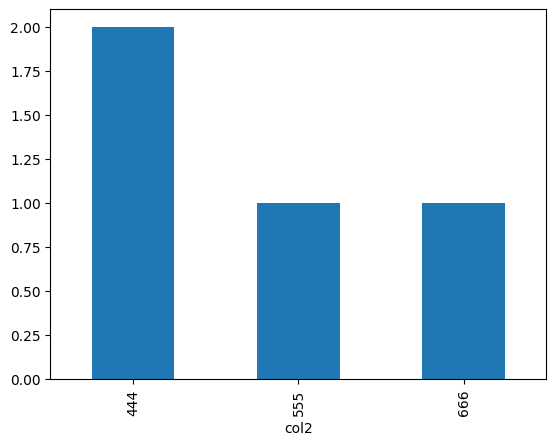

In [432]:
df3['col2'].value_counts().plot(kind='bar')

### Selección de datos

In [430]:
#Selección de un DataFrame filtrando en base a valores de columnas
nuevodf = df3[(df3['col1']>2) & (df3['col2']==444)]
nuevodf

,col1,col2,col3
3,4,444,xyz


### Funciones Apply

In [435]:
def doble(x):
    return x*2

In [436]:
doble(9)

18

In [439]:
df3['col1']

,col1
0,1
1,2
2,3
3,4


In [438]:
# Aplicamos la función cuadrado A TODOS los elementos de col1.  Es una operación columnar, por tanto no hace falta iterar registro a registro
df3['col1'].apply(doble)

,col1
0,2
1,4
2,6
3,8


In [440]:
# Mismo resultado de diferente manera
df3['col1'].apply(lambda x: x**2)

,col1
0,1
1,4
2,9
3,16


In [441]:
df3['col3']

,col3
0,abc
1,def
2,ghi
3,xyz


In [442]:
# Obtener el tamaño de las diferentes filas
df3['col3'].apply(len)

,col3
0,3
1,3
2,3
3,3


In [444]:
df3.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [445]:
# Asignación nuevos nombres columna
df3.columns = ['c1','c2','c3']
df3.columns

Index(['c1', 'c2', 'c3'], dtype='object')

In [446]:
df3

,c1,c2,c3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [447]:
df3.columns = ['col1', 'col2', 'col3']

In [448]:
df3.rename(columns = {'col1':'c1'})

,c1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [449]:
df3.index

RangeIndex(start=0, stop=4, step=1)

In [450]:
df3['col1'].sum()

10

**Eliminar permanentemente una columna**

In [451]:
del df3['col1']
df3

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


**Ordenar los DataFrames:**

In [452]:
df3.sort_values(by='col2', ascending=False) #inplace=False por defecto

# Nota, observad como el índice no varía.  Cada registro sigue manteniendo el índice original.

,col2,col3
2,666,ghi
1,555,def
0,444,abc
3,444,xyz


In [147]:
df3.sort_values(by=['col2','col3'], ascending=False) #inplace=False por defecto

,col2,col3
2,666,ghi
1,555,def
3,444,xyz
0,444,abc


In [453]:
df3.sort_values(by=['col2','col3'], ascending=[False, True])

,col2,col3
2,666,ghi
1,555,def
0,444,abc
3,444,xyz


In [454]:
df3

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz
